In [1]:
import Layer 
import ActivationFunctions 
import Optimizers 
import Loss 
import NeuralNetwork

In [2]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



#load the cifar 10 database

(X_train , y_train ) , (X_test , y_test) = fashion_mnist.load_data()

#reshape the data
X_train = np.reshape(X_train,(60000,28*28))
X_test = np.reshape(X_test,(10000,28*28))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



#regularize the data
X_train /= 255
X_test /= 255

X_train = (X_train - X_train.mean())/X_train.std()

X_test = (X_test - X_test.mean())/X_test.std()

y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10)




In [3]:
pca = PCA(0.99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
comps = pca.n_components_


In [4]:
#create a simple random validation set

X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.05)
print(X_train.shape , X_val.shape)

(57000, 459) (3000, 459)


In [21]:


network = [
  Layer.Layer_Dense(comps, 300),
  ActivationFunctions.ReLu(),
  Layer.Layer_Dense(300 , 100),
  ActivationFunctions.ReLu(),
  Layer.Layer_Dense(100, 10),
  ActivationFunctions.Softmax()
  ]



In [22]:
loss_function = Loss.CategoricalCrossEntropy()
epochs = 100
batch_size = 100
optimizer = Optimizers.Adam(learning_rate=0.001 , decay=0.01)

(avg_train_errors,validation_errors) = NeuralNetwork.train(network , X_train , y_train,loss_function , epochs ,optimizer , batch_size , X_val , y_val ,\
                                                            early_stopping=True)

epoch : 1 | Validation acc : 0.863 | Validation loss : 0.36649 | Train loss : 0.34091 | learning rate : 0.00100 
epoch : 2 | Validation acc : 0.876 | Validation loss : 0.33841 | Train loss : 0.24429 | learning rate : 0.00099 
epoch : 3 | Validation acc : 0.881 | Validation loss : 0.33332 | Train loss : 0.33131 | learning rate : 0.00097 
epoch : 4 | Validation acc : 0.880 | Validation loss : 0.32885 | Train loss : 0.19406 | learning rate : 0.00094 
epoch : 5 | Validation acc : 0.888 | Validation loss : 0.32142 | Train loss : 0.23994 | learning rate : 0.00091 
epoch : 6 | Validation acc : 0.886 | Validation loss : 0.31904 | Train loss : 0.22218 | learning rate : 0.00086 
epoch : 7 | Validation acc : 0.890 | Validation loss : 0.31547 | Train loss : 0.13981 | learning rate : 0.00081 


In [23]:

loss = Loss.MSE()
test_loss, accuracy = NeuralNetwork.predict(network , X_test , y_test ,loss)
print(f"Test loss = {test_loss} Accuracy : {accuracy}")

Test loss = 0.08505210165108633 Accuracy : 0.8826


8


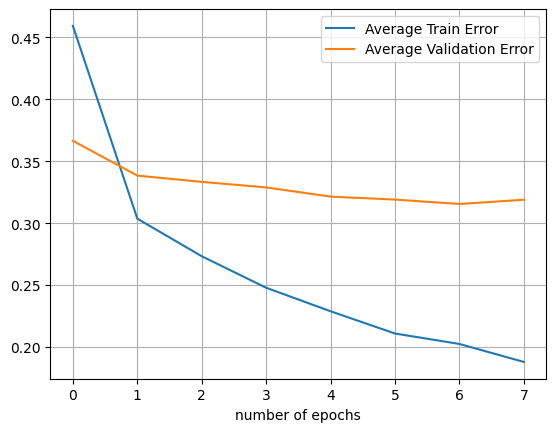

In [24]:
import matplotlib.pyplot as plt

x = [i for i in range(len(avg_train_errors))]
print(len(x))
plt.plot(x , avg_train_errors , x , validation_errors)
plt.xlabel("number of epochs")
plt.legend(("Average Train Error" , "Average Validation Error"))
plt.grid()
plt.show()
